In [1]:
import pandas as pd

In [2]:
df = pd.read_json('../data/raw/applerev.json')

In [3]:
df.head()

,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2020-09-26,AAPL,USD,2020-10-30,2020-10-29 18:06:25,FY,274515000000,169559000000,104956000000,0.382332,...,0.244398,9680000000,57411000000,0.209136,3.3100,3.2800,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2019-09-28,AAPL,USD,2019-10-31 00:00:00,2019-10-30 18:12:36,FY,260174000000,161782000000,98392000000,0.378178,...,0.252666,10481000000,55256000000,0.212381,2.9925,2.9725,18471336000,18595652000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2018-09-29,AAPL,USD,2018-11-05 00:00:00,2018-11-05 08:01:40,FY,265595000000,163756000000,101839000000,0.383437,...,0.274489,13372000000,59531000000,0.224142,3.0025,2.9775,19821508000,20000436000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2017-09-30,AAPL,USD,2017-11-03 00:00:00,2017-11-03 08:01:37,FY,229234000000,141048000000,88186000000,0.384699,...,0.279579,15738000000,48351000000,0.210924,2.3175,2.3025,20868968000,21006768000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2016-09-24,AAPL,USD,2016-10-26 00:00:00,2016-10-26 16:42:16,FY,215639000000,131376000000,84263000000,0.390760,...,0.284605,15685000000,45687000000,0.211868,2.0875,2.0775,21883280000,22001124000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


# Clean Data

In [4]:
df = df.drop(columns=['reportedCurrency', 
                      'fillingDate', 
                      'acceptedDate', 
                      'period', 
                      'link', 
                      'finalLink', 
                      'symbol', 
                      'grossProfitRatio', 
                      'incomeBeforeTaxRatio', 
                      'netIncomeRatio', 
                      'eps', 
                      'epsdiluted'])


In [23]:
df = df.sort_values("date")

TypeError: sort_values() got an unexpected keyword argument 'index'

In [6]:
df.to_csv('../data/interim/AppleInterimRevenue.csv', index = False)

# Data analysis

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

Metrics that I need to analyze.

#### First 
* Revenue
* CostOfRevenue
* grossProfit

#### Second - Expenses
* researchAndDevelopmentExpenses 	
* generalAndAdministrativeExpenses 	
* sellingAndMarketingExpenses 	
* sellingGeneralAndAdministrativeExpenses 	
* otherExpenses 	
* operatingExpenses

#### Third - Earnings before
* ebitda
* operatingIncome
* netIncome


## Creating new frames

#### Revenue Frame

In [11]:
revdf = df[[
    "revenue",
    "costOfRevenue", 
    "grossProfit"]] 
/ 1000000000

In [24]:
revdf.to_csv('../data/interim/RevAppleDf.csv', index = False)

In [25]:
revdf = pd.read_csv('../data/interim/RevAppleDf.csv')

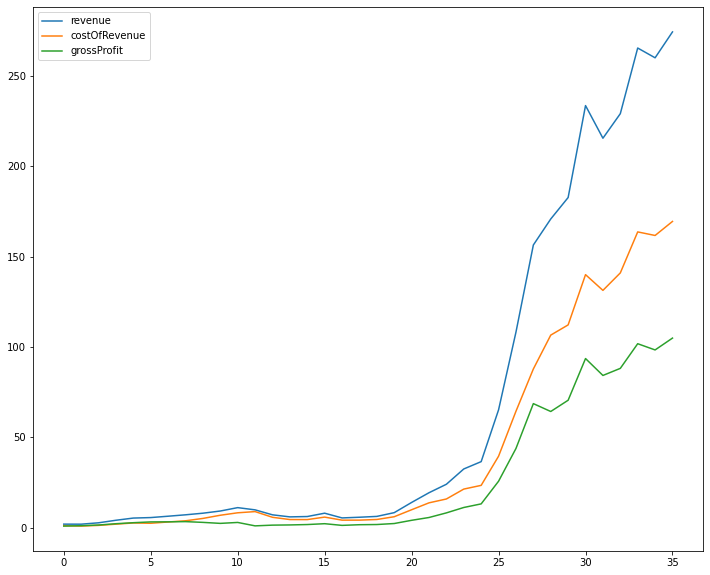

In [28]:
revdf.plot(kind='line');

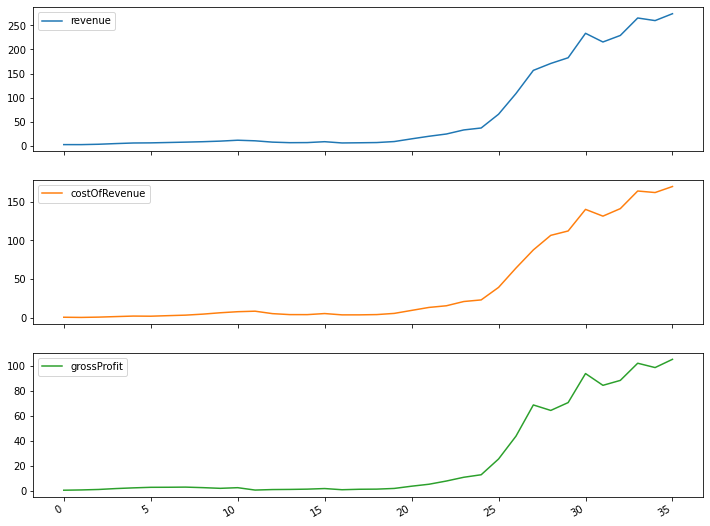

In [29]:
revdf.plot(subplots=True);

#### Expense Frame

In [30]:
expdf = df[[
    "researchAndDevelopmentExpenses",
    "generalAndAdministrativeExpenses",
    "sellingAndMarketingExpenses",
    "sellingGeneralAndAdministrativeExpenses",
    "otherExpenses",
    "operatingExpenses"
]] / 1000000000

In [32]:
expdf.to_csv('../data/interim/ExpAppleDf.csv', index = False)

In [33]:
expdf = pd.read_csv('../data/interim/ExpAppleDf.csv')

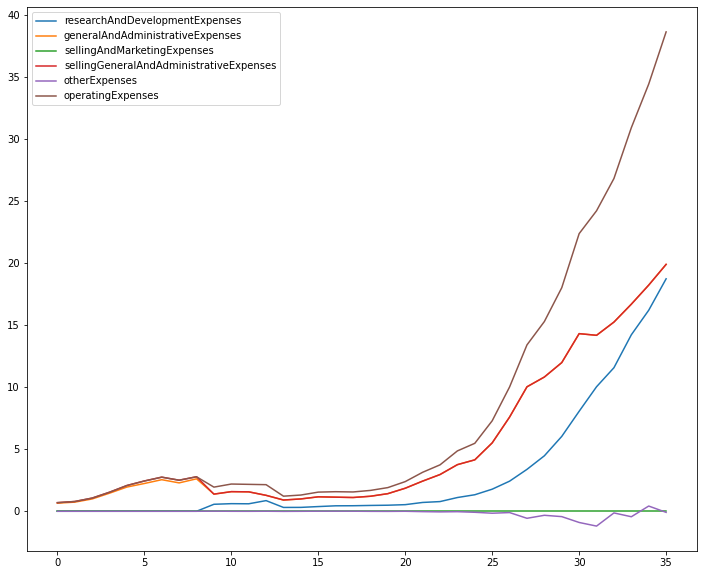

In [34]:
expdf.plot(kind='line');

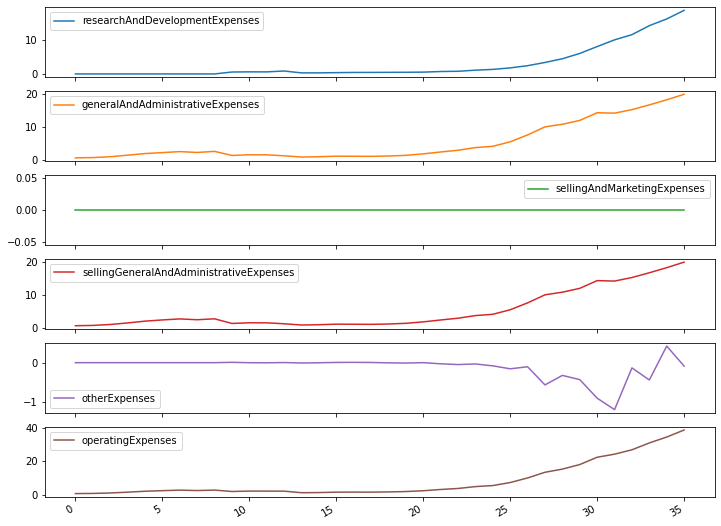

In [41]:
expdf.plot(subplots=True);

#### Earnings frame

In [36]:
eardf = df[[
    "ebitda",
    "operatingIncome",
    "netIncome"]] / 1000000000

In [38]:
eardf.to_csv('../data/interim/EarAppleDf.csv', index = False)

In [39]:
eardf = pd.read_csv('../data/interim/EarAppleDf.csv')

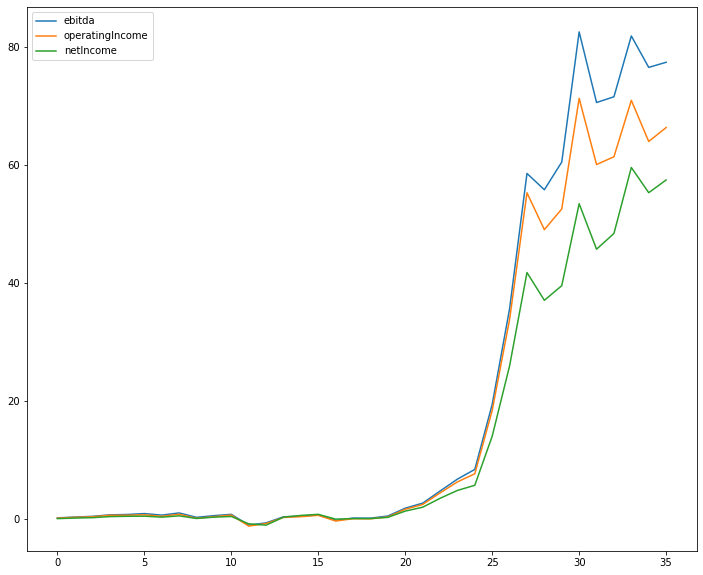

In [40]:
eardf.plot(kind='line');

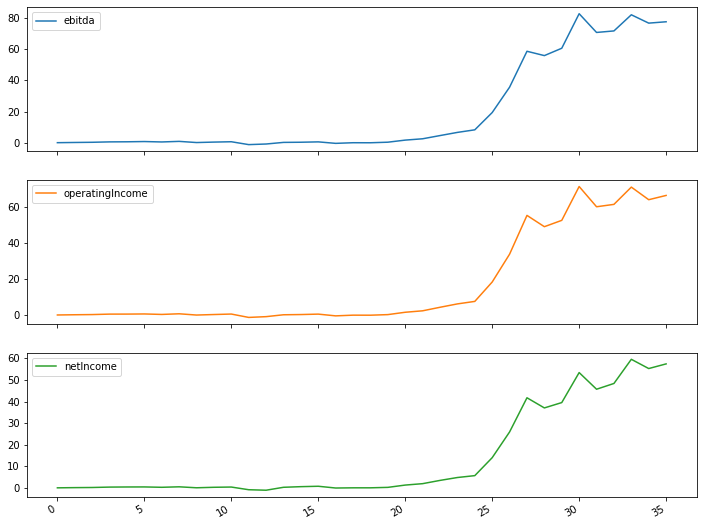

In [42]:
eardf.plot(subplots=True);

## Linear Regression

In [44]:
from sklearn import linear_model

In [46]:
revdf.head()

,revenue,costOfRevenue,grossProfit
0,1.9183,1.0760,0.8423
1,1.9019,0.8400,1.0619
2,2.6611,1.2257,1.4354
3,4.0714,1.9132,2.1582
4,5.2840,2.5700,2.7140


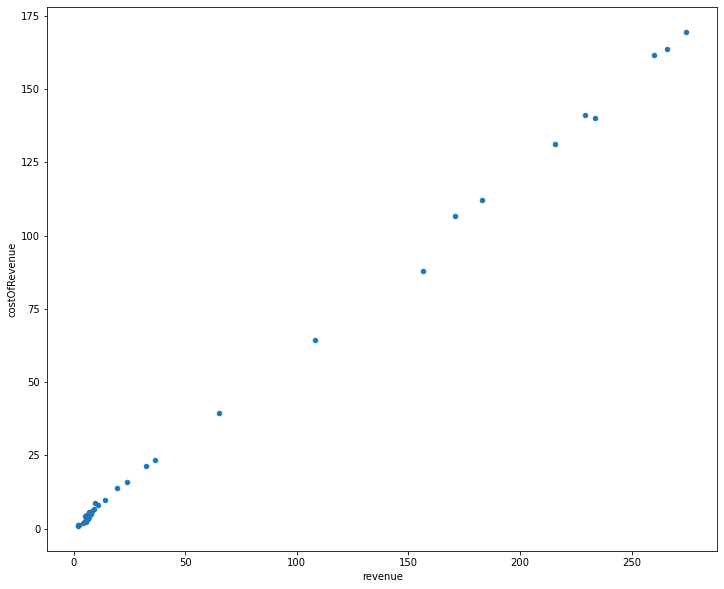

In [49]:
revdf.plot(kind = 'scatter', x='revenue', y='costOfRevenue')
plt.show()

In [52]:
revdf.corr()

,revenue,costOfRevenue,grossProfit
revenue,1.000000,0.999496,0.998771
costOfRevenue,0.999496,1.000000,0.996693
grossProfit,0.998771,0.996693,1.000000
